IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTING THE DATASET

In [2]:
df = pd.read_csv(r"C:\Users\shiva\Downloads\archive (2)\housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


PERFORMING EDA PROCESS

In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.dropna(inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

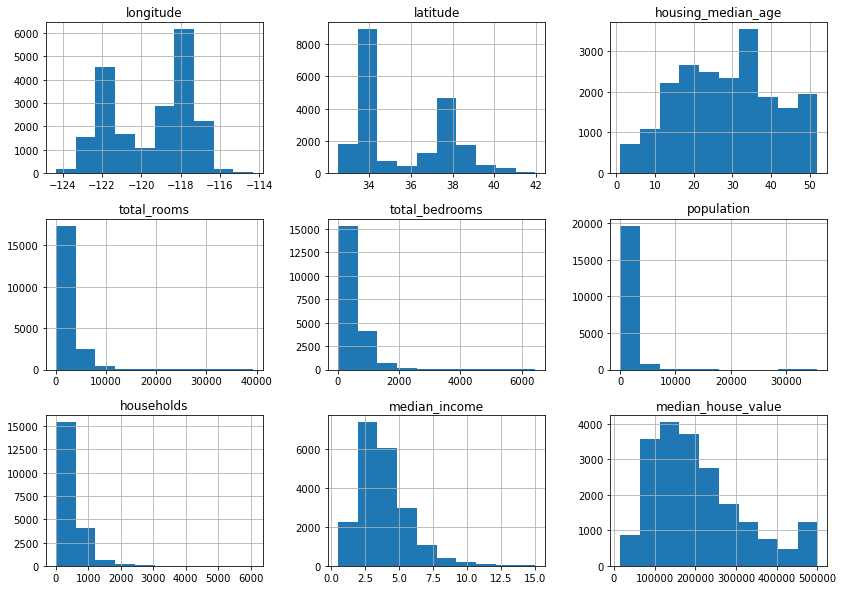

In [9]:
df.hist(figsize= (14,10))

As we can see that int he above graphs some variables are right skewed these variables are not showing a nice gausian bell curve. So will try to reduce the skewness by logrithmic Transformation.
Can also try Box-Cox or square root transformation.
Skewed variables can violate the assumptions of our model, leading to biased and unreliable results.
By reducing the level of skewness, you can improve the accuracy and interpretability of your model.

TRYING TO ALTER THE GRAPHS AS BELL SHAPED CURVE

In [10]:
df["total_rooms"] = np.log(df["total_rooms"] +1)
df["total_bedrooms"] = np.log(df["total_bedrooms"] +1)
df["population"] = np.log(df["population"] +1)
df["households"] = np.log(df["households"] +1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

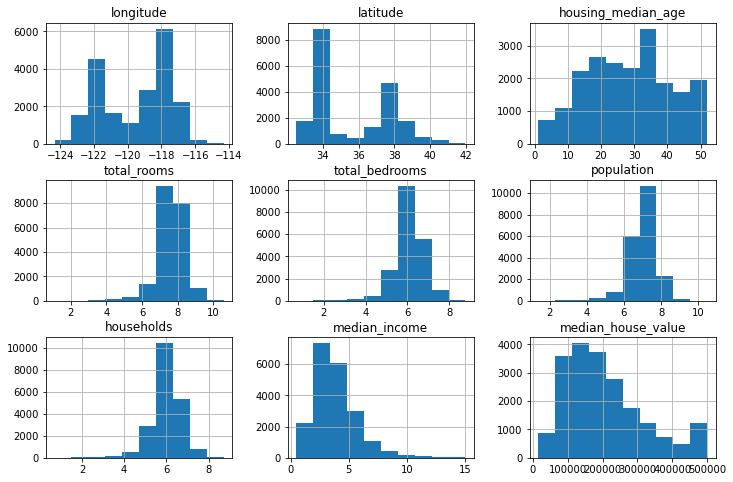

In [11]:
df.hist(figsize=(12,8))

<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

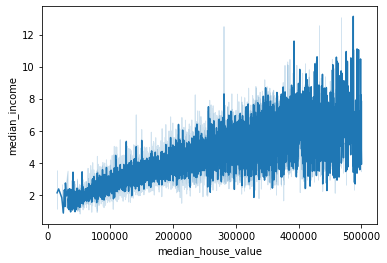

In [12]:
sns.lineplot(data=df, x="median_house_value", y="median_income" )

CHECKING THE CORRELATION BETWEEN THE VARIABLES

<AxesSubplot:>

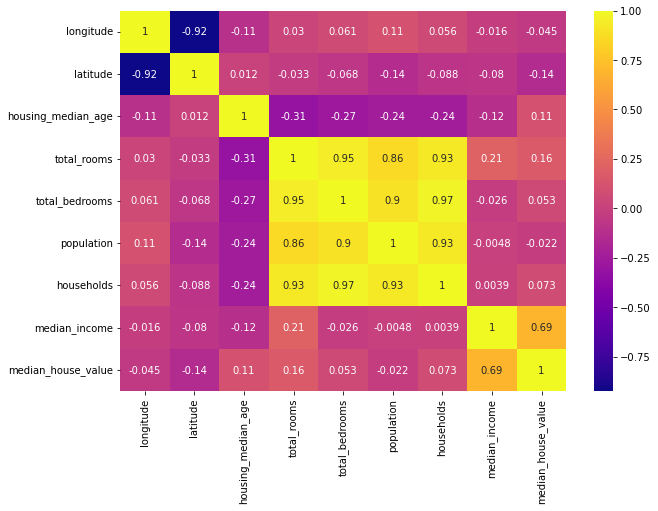

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True, cmap="plasma")

# FEATURE ENGINEERING

In [14]:
# getting dummy features for the 'ocean_promximity' variable
pd.get_dummies(df.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [15]:
#joining my original data with the above dummy features
df1 = df.join(pd.get_dummies(df.ocean_proximity))

In [16]:
df1.drop(["ocean_proximity"], axis = 1, inplace = True)

In [17]:
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0


<AxesSubplot:>

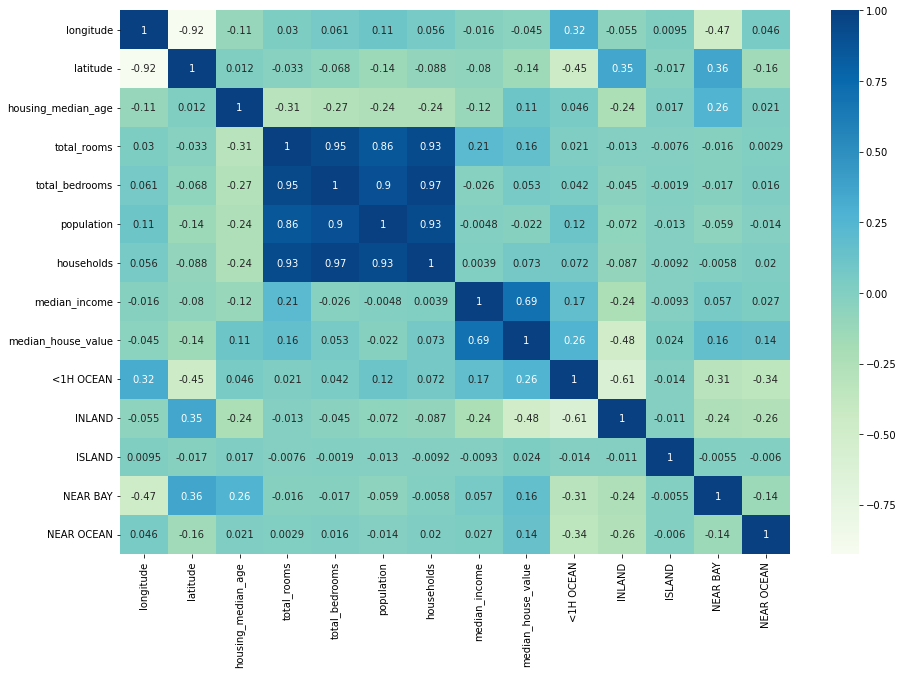

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(), annot = True, cmap="GnBu")

As you can see that median house value is having negative correlation when it's inland type. We have to pay less for the house if it's inland whereas those houses which have less than 1 hour distance from ocean have to pay the hoghest amount.And the houses near bay or near ocean also have high prices.

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

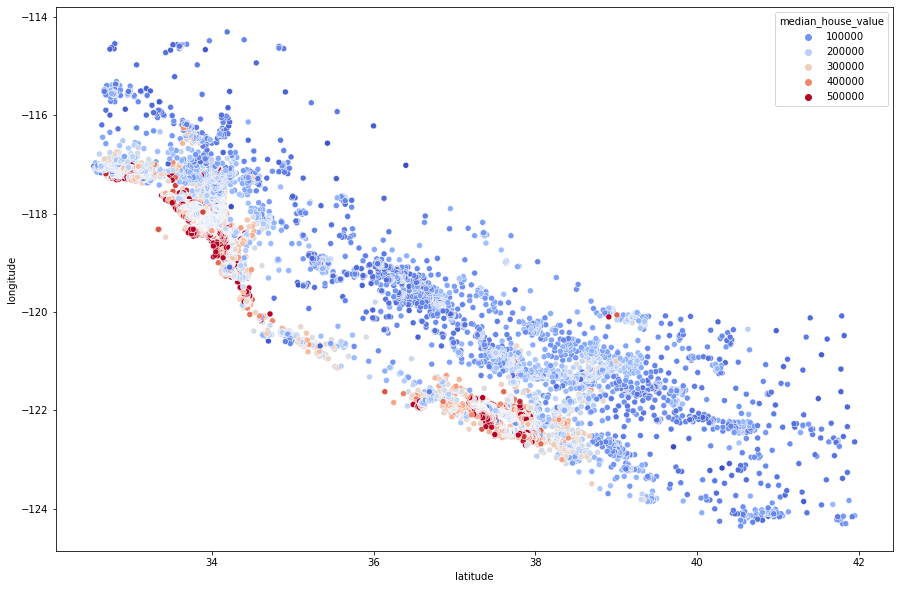

In [19]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='latitude',y='longitude',data = df1, hue = "median_house_value",palette = "coolwarm" )

In [20]:
df1['bedroom_ratio'] = df1['total_bedrooms']/df1['total_rooms']
df1['household_rooms']= df1['total_rooms']/df1['households']

Visualizing the heatmap to check if there is any change in correlations after performing the feature engineering.

<AxesSubplot:>

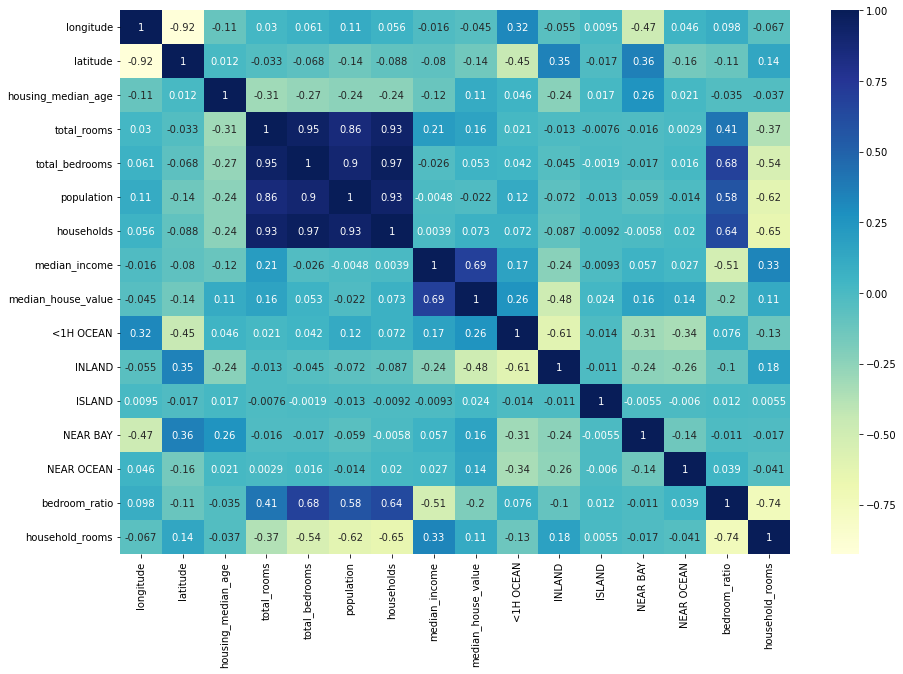

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(), annot = True, cmap="YlGnBu")

As you can see now that the new created features also having some correlation with median_house_value. Bedroom ratio is ahving negative correlation and household rooms is having pretty good corr. with house value.

Making the datset standardized before training the models.

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2 = scaler.fit_transform(df1)

In [23]:
df2 = pd.DataFrame(df2, columns=df1.columns)

In [24]:
#separating the data from target variable
x = df2.drop(["median_house_value"], axis = 1)
y = df2.iloc[:,8:9]
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-1.327314,1.051717,0.982163,-1.130950,-1.633628,-1.694198,-1.568921,2.345163,-0.890239,-0.682713,-0.015645,2.828661,-0.384186,-2.023147,1.506692
1,-1.322323,1.042355,-0.606210,1.650545,1.313730,1.030718,1.449247,2.332632,-0.890239,-0.682713,-0.015645,2.828661,-0.384186,-0.045395,-0.267493
2,-1.332305,1.037674,1.855769,-0.450371,-1.104202,-1.108938,-1.104448,1.782939,-0.890239,-0.682713,-0.015645,2.828661,-0.384186,-1.955075,1.599793
3,-1.337296,1.037674,1.855769,-0.638250,-0.813084,-0.949279,-0.812988,0.932970,-0.890239,-0.682713,-0.015645,2.828661,-0.384186,-0.762569,0.566880
4,-1.337296,1.037674,1.855769,-0.312480,-0.572930,-0.932378,-0.583151,-0.013143,-0.890239,-0.682713,-0.015645,2.828661,-0.384186,-0.807601,0.619206


Splitiing the dataset into training and testing in 80:20 ratio

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state = 2)

In [26]:
#checking the distribution of training and testing data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(16346, 15)
(4087, 15)
(16346, 1)


In [27]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [28]:
LR.fit(X_train,y_train)

LinearRegression()

In [29]:
LR.score(X_test,y_test)

0.6579841982195779

Training random forest model then will compare the scores of both models

RANDOM FOREST REGRESSOR

In [30]:
from sklearn.ensemble import RandomForestRegressor
Forest = RandomForestRegressor()

In [31]:
Forest.fit(X_train, y_train)

C:\Users\shiva\AppData\Local\Temp\ipykernel_31108\157677848.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Forest.fit(X_train, y_train)


RandomForestRegressor()

In [32]:
Forest.score(X_test, y_test)

0.8098108899674052

As we can see that random forest is giving us a better score than linear regression model. It can be because of any reason like Complex interactions between features, Outliers & noise or Feature Importance.

GRIDSEARCH WITH CROSS VALIDATION

Now will try to add a parameter grid to try a different approach and maybe will get a different score afterwards.

In [33]:
from sklearn.model_selection import GridSearchCV


In [34]:
print(y_train)

       median_house_value
2499            -0.975151
11396            2.539456
8467             1.466096
5716            -0.244856
1154            -1.254101
...                   ...
1099            -0.770703
18898           -0.352278
11798           -0.826146
6637            -0.167755
2575            -0.613902

[16346 rows x 1 columns]


In [35]:
Forest = RandomForestRegressor()
param_grid ={
    "n_estimators": [3,10,30],
    "max_features": [2,4,6,8]
}
gridsearch = GridSearchCV(Forest, param_grid, cv =5,
                         scoring = "neg_mean_squared_error",
                         return_train_score = True)
gridsearch.fit(X_train,y_train.values.reshape(-1,))

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [36]:
best_forest = gridsearch.best_estimator_

In [37]:
best_forest.score(X_test,y_test)

0.8082132495354495

We got a worse result than previous random forest model i.e 0.8031. We can try to change the parameters and give it a try to get better results.

In [38]:
Forest = RandomForestRegressor()

param_grid ={
    "n_estimators": [30,50,100],
    "max_features": [2,4,6,8]
}

gridsearch = GridSearchCV(Forest, param_grid, cv =5,
                         scoring = "neg_mean_squared_error",
                         return_train_score = True)
gridsearch.fit(X_train,y_train.values.reshape(-1,))

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [39]:
best_forest = gridsearch.best_estimator_

In [40]:
best_forest.score(X_test,y_test)

0.8097596787424926

Tried to change some parameters of the param_grid again,and now we are getting approx same score(0.8097) as the random forest model giving us(0.8098) with its default parameters.
we can also continue and try some other parameters to get more better result according to the requirements.